In [15]:
%%html
<style>
figure {
    display: flex;
    flex-direction: column;
    align-items: center;
}
figure img {
    max-width: 900px;
    width: 80%;
    margin-bottom: 2em;
}
figcaption {
    aria-hidden: true;
}
</style>

# The Amorphous Kitaev Model

The Kitaev-Honeycomb model is remarkable because it was the first such model that combined three key properties.

First, it is a plausible tight binding Hamiltonian. The form of the Hamiltonian could be realised by a real material. Indeed candidate materials such as $\alpha\mathrm{-RuCl}_3$ were quickly found [@banerjeeProximateKitaevQuantum2016; @trebstKitaevMaterials2022] that are expected to behave according to the Kitaev with small corrections. 

Second, the Kitaev Honeycomb model is deeply interesting to modern condensed matter theory. Its ground state is almost the canonical example of the long sought after quantum spin liquid state. Its excitations are anyons, particles that can only exist in two dimensions that break the normal fermion/boson dichotomy. Anyons have been the subject of much attention because, among other reasons, there are proposals to braid them through space and time to achieve noise tolerant quantum computations @freedmanTopologicalQuantumComputation2003. 

Third and perhaps most importantly, it a rare many body interacting quantum system that can be treated analytically. It is exactly solveable. We can explicitly write down its many body ground states in terms of single particle states @kitaevAnyonsExactlySolved2006. Its solubility comes about because the model has extensively many conserved degrees of freedom that mediate the interactions between quantum degrees of freedom.

__Insert discussion of why a generalisation to the amorphous case is intersting__

### Chapter outline

In this chapter I will discuss the physics of the Kitaev Model on amorphous lattices. 

I'll start by discussing the physics of the Kitaev model in much more detail. Here I will look at the gauge symmetries of the model as well as its solution via a transformation to a Majorana hamiltonian. From this discusssion we will see that for the the model to be sovleable it need only be defined on a trivalent, tri-edge-colourable lattice. 

In the methods section, I will discuss how to generate such lattices and colour them as well as how to map back and forth between configurations of the gauge field and configurations of the fluxes.

In results section, I will begin by looking at the zero temperature physics. I'll present numerical evidence that the ground state flux sector of the model is given by a simple rule. I'll make an assessment of the gapless, abelian and non-abelian phases that are present as well as spontaneous chiral symmetry breaking and topological edge states. We will also compare the zero temperature phase diagram to that of the Kitaev Honeycomb Model. Next I will take the model to finite temperature and demonstrate that there is a phase transition to a thermal metal state.

In the Discussion I will consider possible physical realisations of this model as well the motivations for doing so. I will alao discuss how a well known quantum error correcting code defined on the Kitaev Honeycomb could be generalised to the amorphous case.

Various generalisations have been made, one mode replaces pairs of hexagons with heptagons and pentagons \cite{periNonAbelianChiralSpin2020} and another that replaces vertices of the hexagons with triangles \cite{yaoExactChiralSpin2007}. When we generalise this to the amorphous case, the key property that will remain is that each vertex interacts with exactly three others via an x, y and z edge. However the lattice will no longer be bipartite, breaking chiral symmetry among other things. 


### Kitaev-Heisenberg Model
In real materials there will generally be an addtional small Heisenberg term
$$H_{KH} =  - \sum_{\langle j,k\rangle_\alpha} J^{\alpha}\sigma_j^{\alpha}\sigma_k^{\alpha} + \sigma_j\sigma_k$$

## Introduction to the Kitaev Model

### Commutation relations
Before diving into the Hamiltonian of the Kitaev Model, here is a quick refresher of the key commutation relations of spins, fermions and Majoranas.

#### Spins
Skip this is you're super familiar with the algebra of the Pauli martrices. Scalars like $\delta_{ij}$ should be understood to be multiplied by an implicit identity $\mathbb{1}$ where necessary.

We can represent a single spin$-1/2$ particle using the Pauli matrices $(\sigma^x, \sigma^y, \sigma^z) = \vec{\sigma}$, these matrices all square to the identity $\sigma^\alpha \sigma^\alpha = \mathbb{1}$ and obey nice commutation and exchange rules:
$$\sigma^\alpha \sigma^\beta = \delta^{\alpha \beta} + i \epsilon^{\alpha \beta \gamma} \sigma^\gamma$$
$$[\sigma^\alpha, \sigma^\beta] = 2 i \epsilon^{\alpha \beta \gamma} \sigma^\gamma$$

Adding a sites indices $ijk...$, spins at different spatial sites commute always $[\vec{\sigma}_i, \vec{\sigma}_j] = 0$ so when $i \neq j$
$$\sigma_i^\alpha \sigma_j^\beta = \sigma_j^\alpha \sigma_i^\beta$$
$$[\sigma_i^\alpha, \sigma_j^\beta] = 0$$
while the previous equations hold for $i = j$.

Two extra relations that will be useful for the Kitaev model are the value of $\sigma^\alpha \sigma^\beta \sigma^\gamma$ and $[\sigma^\alpha \sigma^\beta, \sigma^\gamma]$ when $\alpha \neq \beta \neq \gamma$ these can be computed quite easily by appling the above relations yielding:
$$\sigma^\alpha \sigma^\beta \sigma^\gamma = i \epsilon^{\alpha\beta\gamma}$$
and
$$[\sigma^\alpha \sigma^\beta, \sigma^\gamma] = 0$$

#### Fermions and Majoranas
The fermionic creation and anhilation operators are defined by the canonical anticommutation relations
$$\begin{aligned}
\{f_i, f_j\} &= \{f^\dagger_i, f^\dagger_j\} = 0\\
\{f_i, f^\dagger_j\} &= \delta_{ij}
\end{aligned}$$
which give us the exchange statistics and Pauli exclusion principle.

From fermionic operators, we can construct Majorana operators:
$$\begin{aligned}
f_i         &= 1/2 (a_i + ib_i)\\
f^\dagger_i &= 1/2(a_i - ib_i)\\
a_i         &= f_i + f^\dagger_i = 2\mathbb{R}f\\
b_i         &= 1/i(f_i - f^\dagger_i) = 2\mathbb{I} f 
\end{aligned}$$

Majorana operators are the real and imaginary parts of the fermionic operators, physically they correspond to the orthogonal superpositions of the presence and absence of the fermion and are thus a kind of quasiparticle.

Once we involve multiple fermions there is quite a bit of freedom in how we can perform the transformation from $n$ fermions $f_i$ to $2n$ Majoranas $c_i$. The property that must be preserved however is that the Majoranas still anticommute:

$$ \{c_i, c_j\} = 2\delta_{ij}$$

### The Hamiltonian
To get down to brass tacks, the Kitaev Honeycomb model is a model of interacting spin$-1/2$s on the vertices of a honeycomb lattice. Each bond in the lattice is assigned a label $\alpha \in \{ x, y, z\}$ and that bond couples its two spin neighbours along the $\alpha$ axis. See +@fig:visual_kitaev_1 for a diagram.

This gives us the Hamiltonian
$$H =  - \sum_{\langle j,k\rangle_\alpha} J^{\alpha}\sigma_j^{\alpha}\sigma_k^{\alpha},$$
where $\sigma^\alpha_j$ is a Pauli matrix acting on site $j$ and $\langle j,k\rangle_\alpha$ is a pair of nearest-neighbour indices connected by an $\alpha$-bond with exchange coupling $J^\alpha$ @kitaevAnyonsExactlySolved2006. For notational brevity is is useful to introduce the bond operators $K_{ij} = \sigma_j^{\alpha}\sigma_k^{\alpha}$ where $\alpha$ is a function of $i,j$ that picks the correct bond type.


<!-- ![alt text](../figure_code/amk_chapter/visual_kitaev_1.svg){width=100% #fig:honeycomb_zoom} -->

<figure>
<img src="../figure_code/amk_chapter/visual_kitaev_1.svg" id='#fig:vis_kitaev_1'/>
</figure>

@fig:vis_kitaev_1

This Kitaev model has a set of conserved quantities that, in the spin language, take the form of Wilson loop operators $W_p$ winding around a closed path on the lattice. The direction doesn't matter, but I will stick to clockwise here. I'll use the term plaquette and the symbol $\phi$ to refer to a Wilson loop operator that does not enclose any other sites, such as a single hexagon in a honeycomb lattice. 

$$W_p = \prod_{\mathrm{i,j}\; \in\; p} K_{ij} = \sigma_1^z \sigma_2^x \sigma_2^y \sigma_3^y .. \sigma_n^y \sigma_n^y \sigma_1^z$$

__add a diagram of a single plaquette with labelled site and bond types__

In closed loops, each site appears twice in the product with two of the three bond types. Applying $\sigma^\alpha \sigma^\beta = \epsilon^{\alpha \beta \gamma} \sigma^\gamma, \alpha \neq \beta$ then gives us a product containing a single pauli matrix associated with each site in the loop with the type of the _outward_ pointing bond. From this we see that the $W_p$ associated with hexagons or shapes with an even number of sides all square to 1 and hence have eigenvalues $\pm 1$.

A consequence of the fact that the honeycomb lattice is bipartite is that there are no closed loops that contain an even number of edges[^bipartite] and hence all the $W_p$ have eigenvalues $\pm 1$ on bipartite lattices. Later we will show that plaquettes with an odd number of sides (odd plaquettes for short) will have eigenvalues $\pm i$.

<figure>
<img src="../figure_code/amk_chapter/regular_plaquettes/regular_plaquettes.svg">
<figcaption aria-hidden="true">
    The eigenvalues of a loop or plaquette operators depend on how many bonds in its enclosing path. 
</figcaption>
</figure>

[^bipartite]: A bipartite lattice is composed of A and B sublattices with no intra-sublattice edges i.e no A-A or B-B edges. Any closed loop must begin and at the same site, let's say it's an A site. The loop must go A-B-A-B... until it returns to the original site and must therefore must contain an even number of edges in order to end on the same sublattice that it started on.

Remarkably, all of the spin bond operators $K_{ij}$ commute with all the Wilson loop operators $W_p$.
$$[W_p, J_{ij}] = 0$$
We can prove this by considering the three cases:
1. neither $i$ nor $j$ is part of the loop
2. one of $i$ or $j$ are part of the loop
3. both are part of the loop

The first case is trivial while the other two require a bit of algebra, outlined in +@fig:visual_kitaev_2.

<!-- ![alt text](../figure_code/amk_chapter/visual_kitaev_2.svg){width=100% #fig:visual_kitaev_2} -->
<figure>
<img src="../figure_code/amk_chapter/visual_kitaev_2.svg"/>
</figure>

Since the Hamiltonian is just a linear combination of bond operators, it also commutes with the plaquette operators! This is great because it means that the there's a simultaneous eigenbasis for the Hamiltonian and the plaquette operators. We can thus work in a basis in which the eigenvalues of the plaquette operators take on a definite value and for all intents and purposes act like classical degrees of freedom. These are the extensively many conserved quantities that make the model tractable.

I will use the term flux to refer to expectation value of a plaquette operator. Fixing the fluxes thus partitions the many body Hilbert space into a set of 'flux sectors' labelled by that particular flux configuration.


### Mapping to Majorana operators.
#### For a single spin
Let's start by considering just one site and its $\sigma^x, \sigma^y$ and $\sigma^z$ operators which live in a two dimensional Hilbert space $\mathcal{L}$. 

We will introduce two fermionic modes $f$ and $g$ that satisy the canonical anticommutation relations along with their number operators $n_f = f^\dagger f, n_g = g^\dagger g$ and the total fermionic parity operator $F_p = (2n_f - 1)(2n_g - 1)$ which we can use to divide their Fock space up into even and odd parity subspaces which are separated by the addition or removal of one fermion.

From these two fermionic modes we can build four Majorana operators:
$$\begin{aligned}
b^x &= f + f^\dagger\\
b^y &= -i(f - f^\dagger)\\
b^z &= g + g^\dagger\\
c   &= -i(g - g^\dagger)
\end{aligned}$$

The Majoranas obey the usual commutation relations, squaring to one and anticommuting with eachother. The fermions and Majorana live in a 4 dimenional Fock space $\mathcal{\tilde{L}}$. We can therefore identify the two dimensional space $\mathcal{M}$ with one of the partity subspaces of $\mathcal{\tilde{L}}$ which we will call the _physical subspace_ $\mathcal{\tilde{L}}_p$. Kitaev defines the operator 
$$D = b^xb^yb^zc$$
which can be expanded out to
$$D = -(2n_f - 1)(2n_g - 1) = -F_p$$
and labels the physical subspace as the space sanned by states for which 
$$ D|\phi\rangle = |\phi\rangle$$

We can also think of the physical subspace as whatever is left after applying the projector 
$$P  = \frac{1 - D}{2}$$
to it. This formulation will be useful for taking states that span the extended space $\mathcal{\tilde{M}}$ and projecting them into the physical subspace. 

So now, with the caveat that we are working in the physical subspace, we can define new pauli operators:

$$\tilde{\sigma}^x = i b^x c,\; \tilde{\sigma}^y = i b^y c,\; \tilde{\sigma}^y = i b^y c$$

These extended space pauli operators satisfy all the usual commutation relations, the only difference being that if we evaluate $\sigma^x \sigma^y \sigma^z = i$ we instead get
$$ \tilde{\sigma}^x\tilde{\sigma}^y\tilde{\sigma}^z = iD $$

Which indeed makes sense, as long as we promise to confine ourselves to the physical subspace $D = 1$ and this all makes sense.

<figure>
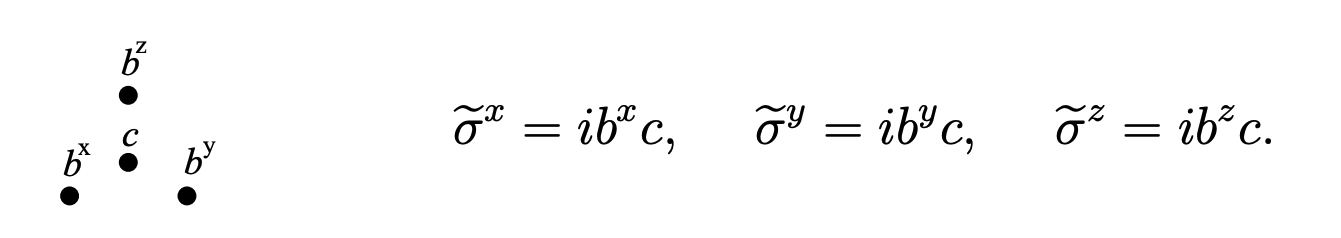
</figure>

#### For multiple spins

This construction generalises easily to the case of multiple spins: we get a set of 4 Majoranas $b^x_j,\; b^y_j,\;b^z_j,\; c_j$ and a $D_j = b^x_jb^y_jb^z_jc_j$ operator for every spin. For a state to be physical we require that $D_j |\psi\rangle = |\psi\rangle$ for all $j$.

From these each Pauli operator can be constructed:
$$\tilde{\sigma}^\alpha_j = i b^\alpha_j c_j$$

This is where the magic happens. We can promote the spin hamiltonian from $\mathcal{L}$ into the extended space $\mathcal{\tilde{L}}$, safe in the knowledge that nothing changes so long as we only actually work with physical states. The Hamiltonian
$$\begin{aligned}
\tilde{H} &=  - \sum_{\langle j,k\rangle_\alpha} J^{\alpha}\tilde{\sigma}_j^{\alpha}\tilde{\sigma}_k^{\alpha}\\
          &= \frac{i}{4} \sum_{\langle j,k\rangle_\alpha} 2J^{\alpha} (ib^\alpha_i b^\alpha_j) c_i c_j\\
          &=  \frac{i}{4} \sum_{\langle i,j\rangle_\alpha} 2J^{\alpha} \hat{u}_{ij} \hat{c}_i \hat{c}_j
\end{aligned}$$

We can factor out the Majorana bond operators $\hat{u}_{ij} = i b^\alpha_i b^\alpha_j$. Note that these bond operators are not equal to the spin bond operators $K_{ij} = \sigma^\alpha_i \sigma^\alpha_j = - \hat{u}_{ij} c_i c_j$. In what follows we will work much more frequently with the Majorana bond operators so when I refer to bond operators without qualification, I am refering to the Majorana variety. 

Similar to the argument with the spin bond operators $K_{ij}$ we can quickly verify by considering three cases that the Majorana bond operators $u_{ij}$ all commute with one another. They square to one so have eigenvalues $\pm 1$ and they also commute with the $c_i$ operators.

Another important point here is that the operators $D_i = b^x_i b^y_i b^z_i c_i$ commute with $K_{ij}$ and therefore with $\tilde{H}$. We will show later that the action of $D_i$ on a state is to flip the values of the three $u_{ij}$ bonds that connect to site $i$. Physcially this is telling us that $u_{ij}$ is a gauge field with a high degree of degeneracy. 

In summary Majorana bond operators $u_{ij}$ are an emergent, classical, $\mathbb{Z_2}$ gauge field!

### Breaking up into bond sectors
Similar to the story with the plaquette operators from the spin language, we can break the Hilbert space $\mathcal{L}$ up into sectors labelled by the a set of choices $\{\pm 1\}$ for the value of each $u_{ij}$ operator which I denote by $\mathcal{L}_u$. Since $u_{ij} = -u_{ji}$ we can represent the $u_{ij}$ graphically with an arrow that points along each bond in the direction in which $u_{ij} = 1$.

Once confined to a particular $\mathcal{L}_u$, we can 'remove the hats' from the $\hat{u}_{ij}$ and the hamiltonian becomes a quadratic, free fermion problem 
$$\tilde{H_u} =  \frac{i}{4} \sum_{\langle i,j\rangle_\alpha} 2J^{\alpha} u_{ij} c_i c_j$$
the ground state of which, $|\psi_u\rangle$ can be found easily via matrix diagonalisation. If you have been paying very close attention, you may at this point ask whether the $\mathcal{L}_u$ are confined entirely within the physical subspace $\mathcal{L}_p$ and indeed we will see that they are not. However it will be helpful to first develop the theory of the Majorana Hamiltonian a little more.

<!-- ![**(a)** The standard Kitaev Model is defined on a honeycomb lattice. The special feature of the honeycomb lattice that makes the model solveable it is that each vertex is joined by exactly three bonds i.e the lattice is trivalent. One of three labels is assigned to each **(b)** We represent the antisymmetric gauge degree of freedom $u_{jk} = \pm 1$ with arrows that point in the direction $u_{jk} = +1$ **(c)** The Majorana transformation can be visualised as breaking each spin into four Majoranas which then pair along the bonds. The pairs of x,y and z Majoranas become part of the classical $\mathbb{Z}_2$ gauge field $u_{ij}$ leaving just a single Majorana $c_i$ per site.](../figure_code/amk_chapter/honeycomb_zoom/intro_figure_template.svg){width=100% #fig:honeycomb_zoom} -->

<figure>
<img src="../figure_code/amk_chapter/honeycomb_zoom/intro_figure_template.svg">
<figcaption aria-hidden="true"><span>Figure&nbsp;2:</span>
**(a)** The standard Kitaev Model is defined on a honeycomb lattice. The special feature of the honeycomb lattice that makes the model solveable it is that each vertex is joined by exactly three bonds i.e the lattice is trivalent. One of three labels is assigned to each **(b)** We represent the antisymmetric gauge degree of freedom $u_{jk} = \pm 1$ with arrows that point in the direction $u_{jk} = +1$ **(c)** The Majorana transformation can be visualised as breaking each spin into four Majoranas which then pair along the bonds. The pairs of x,y and z Majoranas become part of the classical $\mathbb{Z}_2$ gauge field $u_{ij}$ leaving just a single Majorana $c_i$ per site.
</figcaption>
</figure>

### The Majorana Hamiltonian

We now have a quadtratic hamiltonian
$$ \tilde{H} =  \frac{i}{4} \sum_{\langle i,j\rangle_\alpha} 2J^{\alpha} u_{ij} c_i c_j$$
in which most of the Majorana degrees of freedom have paired along bonds to become a classical gauge field $u_{ij}$. 

As a consequence of the the antisymmetry of the matrix with entries $J^{\alpha} u_{ij}$, the eigenvalues of the Hamiltonian $\tilde{H}_u$ come in pairs $\pm \epsilon_m$. This redundant information is a consequence of the doubling of the Hilbert space which occured when we transformed to the Majorana representation. 

If we pair organise the eigenmodes of $H$ into pairs such that $b_m$ and $b_m'$ have energies $\epsilon_m$ and $-\epsilon_m$ we can construct the transformation $Q$
$$(c_1, c_2... c_{2N}) Q = (b_1, b_1', b_2, b_2' ... b_{N}, b_{N}')$$
and put the Hamiltonian into the form
$$\tilde{H}_u = \frac{i}{2} \sum_m \epsilon_m b_m b_m'$$

The determinant of $Q$ will be useful later when we consider the projector from $\mathcal{\tilde{L}}$ to $\mathcal{L}$ but otherwise the $b_m$ are just an intermediate step. From them we form fermionic operators
$$ f_i = \tfrac{1}{2} (b_m + ib_m')$$
with their associated number operators $n_i = f^\dagger_i f_i$. These let us write the Hamiltonian neatly as

$$ \tilde{H}_u = \sum_m \epsilon_m (n_m - \tfrac{1}{2}).$$

The ground state $|n_m = 0\rangle$ of the many body system at fixed $u$ is then
$$E_{u,0} = -\frac{1}{2}\sum_m \epsilon_m $$ and we can construct any state from a particular choice of $n_m = 0,1$.

In cases where all we care about it the value of $E_{u,0}$ it is possible to skip forming the fermionic operators. The eigenvalues obtained directly from diagonalising $J^{\alpha} u_{ij}$ come in $\pm \epsilon_m$ pairs. We can take half the absolute value of the whole set to recover $\sum_m \epsilon_m$ easily.

### Getting back to the physical subspace 

At this point, given a particular bond configuration $u_{ij} = \pm 1$ we are able to construct a quadratic Hamiltonian $\tilde{H}_u$ in the extended space and diagonalise it to find its ground state $|\vec{u}, \vec{n} = 0\rangle$. This is not necessarily the ground state of the system as a whole, it just the lowest energy state within the subspace $\mathcal{L}_u$

__However, $|u, n_m = 0\rangle$ does not lie in the physical subspace__. As an example let's take the lowest energy state associated with $u_{ij} = +1$, this state satisfies 
$$u_{ij} |\vec{u}=1, \vec{n} = 0\rangle = |\vec{u}=1, \vec{n} = 0\rangle$$
for all bonds $i,j$.

If we act on it this state with one of the gauge operators $D_j = b_j^x b_j^y b_j^z c_j$ we see that $D_j$ flips the value of the three bonds $u_{ij}$ that surround site $k$:

$$ |u'\rangle = D_j |u=1, n_m = 0\rangle$$

$$ \begin{aligned}
\langle u'|u_{ij}|u'\rangle &=  \langle u| b_j^x b_j^y b_j^z c_j \;ib^x_i b^x_j\; b_j^x b_j^y b_j^z c_j|u\rangle\\
&= -1
\end{aligned}$$ 

Since $D_j$ commutes with the hamiltonian in the extended space $\tilde{H}$, the fact that $D_j$ flips the value of bond operators is telling us that there is a gauge degeneracy between the ground state of $\tilde{H}_u$ and the set of $\tilde{H}_{u'}$ related to it by gauge transformations $D_j$. I.e we can flip any three bonds around a vertex and the physics will stay the same.

We can turn this into a symmetrisation procedure by taking a superposition of every possible gauge transformation. Every possible gauge transformation is just every possible subset of ${D_0, D_1 ... D_n}$ which can be neatly expressed as 
$$|\phi_w\rangle = \prod_i \left( \frac{1 + D_i}{2}\right) |\tilde{\phi}_u\rangle$$
this is nice because the quantity $\frac{1 + D_i}{2}$ is also the local projector onto the physical subspace. Here $|\phi_w\rangle$ is a gauge invariant state that lives in $\mathcal{L}_p$ which has been constructed from a set of states in different $\mathcal{L}_u$.

This gauge degeneracy leads nicely onto the next topic which is how to construct a set of gauge invariant quantities out of the $u_{ij}$, these will turn out to just be the plaquette operators.

### Properties of the Gauge Fields

The bond operators $u_{ij}$ are useful because they label a bond sector $\mathcal{\tilde{L}}_u$ in which we can easiy solve the Hamiltonian. However the gauge operators move us between bond sectors. __Bond sectors are not gauge invariant!__

Let's consider instead the properties of the plaquette operators $\hat{\phi}_i$ that live on the faces of the lattice. 

We already showed that they are conserved. And as one might hope and expect, the plaquette operators map cleanly on to the bond operators of the Majorana representation:

$$\begin{aligned}
\tilde{W}_p &= \prod_{\mathrm{i,j}\; \in\; p} \tilde{K}_{ij}\\
            &= \prod_{\mathrm{i,j}\; \in\; p} \tilde{\sigma}_i^\alpha \tilde{\sigma}_j^\alpha\\
            &= \prod_{\mathrm{i,j}\; \in\; p} (ib^\alpha_i c_i)(ib^\alpha_j c_j)\\
            &= \prod_{\mathrm{i,j}\; \in\; p} i u_{ij} c_i c_j\\
            &= \prod_{\mathrm{i,j}\; \in\; p} i u_{ij}
\end{aligned}$$

Where the last steps holds because each $c_i$ appears exactly twice and adjacent to its neighbour in each plaquette operator. Note that this is consistent with the observation from earlier that each $W_p$ takes values $\pm 1$ for even paths and $\pm i$ for odd paths.

### Vortices and their movements

Let's imagine we started from the ground state of the model and flipped the sign of a single bond. In doing so we will flip the sign of the two plaquettes adjacent to that bond. I'll call these disturbed plaquettes _fluxes_. I'll refer to a particular choice values for the plaquette operators as a flux sector.

If we chain multiple bond flips we can create a pair of fluxes at arbitrary locations. The chain of bonds that we must flip corresponds to a path on the dual of the lattice. 

Something else we can do is create a pair of fluxes, move one around a loop and then anhilate it with its partner. This corresponds to a closed loop on the dual lattice and applying such a bond flip leaves the flux sector unchanged. 

Notice that the $D_j$ operators flip three bonds around a vertex. This is the smallest closed loop around which one can move a vortex pair and anhilate it with itself. 

Such operations compose in the sense that we can build any larger loop by applying a series of $D_j$ operations. Indeed the symetrisation procedure $\prod_i \left( \frac{1 + D_i}{2}\right)$ that maps from the bond sector to a physical state is applying constructing a superposition over every such loop that leaves the vortex sector unchanged.

The only loops that we cannot build out of $D_j$s are non-contractible loops, such as those that span the major or minor circumference of the torus.

__The plaquette operators are the gauge invariant quantity that determines the physics of the model__

#### Gauge Degeneracy and the Euler Equation
We can check this analysis with a counting argument. For a lattice with $B$ bonds, $P$ plaquettes and $V$ vertices we can count how many bond sectors, fluxes sectors and gauge symmetries there are and check them against Euler's polyhedra equation.

Euler's equation states for a closed surface of genus $g$, i.e that has $g$ holes so $0$ for the sphere, $1$ for the torus and $g$ for $g$ tori stuck together
$$B = P + V + 2 - 2g$$

##### For the torus

<figure>
<img src="../figs/torus.jpeg" style="max-width:700px;width:100%;">
<figcaption>
    In periodic boundary conditions the Kitaev model is defined on the surface of a torus. Topologically the torus is distinct from the sphere in that it has a hole that cannot be smoothly deformed away. Associated with each such hole are two non-contractible loops on the surface, here labeled A and B, that cannot be smoothly deformed to a point. These two non-contracible loops can. be used to construct two symmetry operators $\hat{A}$ and $\hat{A}$ that flip $u_{jk}$s along their paths. 
</figcaption>
</figure>

For the case of the torus where $g = 1$ we can rearrange this to read:
$$B = (P-1) + (V-1) + 2$$

Each $u_{ij}$ takes two values and there is one associated with each bond so there are exactly $2^B$ distinct configurations of the bond sector. Let's see if we can factor those configurations out into the cartesian product of flux sectors, gauge symmetries and non-contractible loop operators.

Flux sectors: each plaquette operator $\phi_i$ takes two values ($\pm 1$ or $\pm i$) and there are $P$ of them so naively one would think there are $2^P$. However if we take a particular flux configuration and flip every flux to create its complement, this will correspond to the same bond sector so there are really $\tfrac{2^P}{2} = 2^{P-1}$ flux sectors.

Gauge symmetries: As discussed earlier these correspond to the all possible compositions of the $D_j$ operators. Again there are only $2^{V-1}$ of these because $\prod_{j} D_j = \mathbb{1}$ maps any set of $D_j$ operators to its complement. You can see that $\prod_{j} D_j = \mathbb{1}$ visually by imagining larger and larger patches of $D_j$ operators on the torus with a flux loop corresponging to flipped bonds around the edge of the patch. At some point the patch wraps around and starts to cover the entire torus, as this happens the boundary contracts to a point and disappears which corresponds to the identity operation. See Fig ?? (animated in the HTML version).

Finally the torus has two non-contractible loop operators asscociated with its major and minor diameters.

Putting this all together we see that there are __$2^B$ bond sectors__ a space which can be decomposed into the cartesian product of __$2^{P-1}$ flux sectors__, __$2^{V-1}$ gauge symmetries__ and __$2^2 = 4$ topological sectors__ associated with the non-contractible loop operators. This last factor forms the basis of proposals to construct topologically protected qubits since the 4 sectors cold only be mixed by a highly non-local perturbation, ref ?????.

<figure>
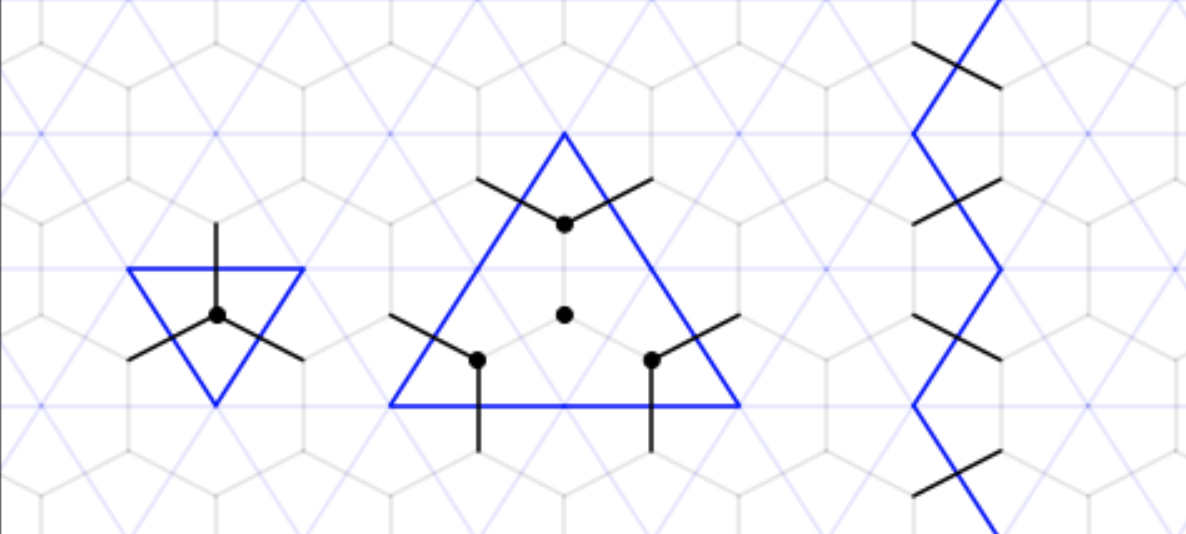
<figcaption>
   A honeycomb lattice with edges in light grey, along with its dual, the triangle lattice in light blue. The vertices of the dual lattice are the faces of the original lattice and hence are the locations of the fluxes. (Left) The action of the gauge operator $D_j$ at a vertex is to flip the value of the three $u_{jk}$ variables (black lines) surounding site $j$. The corresponding edges of the dual lattice (blue lines) form a closed triangle. (middle) Composing multiple adjacent $D_j$ operators produces a large closed loop or multiple disconnected loops. These loops are notn directed as they are in the case of the Wilson loops. (right) A non-contractable loop which cannot be produced by composing $D_j$ operators. All three operators can be thought of as the action of a vortex-vortex pair that is created, one of them is transported around the loop and then the two anhilate again. Note that every plaquette has an even number of $u_{ij}$s flipped on it's edge and hence all retain the same value. This all works the same way for the amorphous lattice but is much harder to read visually.
</figcaption>
</figure>

#### Counting edges, plaquettes and vertices

It will be useful to know how the trivalent structre of the lattice constraints the number of bonds $B$, plaquettes $P$ and vertices $V$ it has. 

We can immediately see that the lattice is built from vertices that each share 3 edges with their neighbours. This means each vertex comes with $\tfrac{3}{2}$ bonds i.e $3V = 2B$. This is consistent with the fact that in the Majorana representation on the torus each vertex brings three $b^\alpha$ operators which then pair along bonds to give $3/2$ bonds per vertex. 

If we define an integer $N$ such that $V = 2N$ and $B = 3N$ and substitite this into the polyhedra equation for the torus we see that $P = N$. So if is a trivalent lattice on the torus has $N$ plaquettes, it has $2N$ vertices and $3N$ bonds.

We can also consider the sum of the number of bonds in each plaquette $S_p$, since each bond is a member of exactly two plaquettes 
$$S_p = 2B = 6N$$

__The mean size of a plaquette in a trivalent lattice on the torus is exactly 6__

#### Composition of loops 

<figure style = "display:flex; flex-direction:column; ">
<img src="../figure_code/amk_chapter/plaquette_addition/plaquette_addition_by_hand.svg" style="max-width:300px;width:100%;">
<figcaption aria-hidden="true"><span>Figure&nbsp;2:</span>
In the product of individual plaquette operators shared bonds cancel out. The product is equal to the enclosing path.
</figcaption>
</figure>

Second it is now easy to show that the loops and plaquettes satisfy nice composition rules, so long as we stick to loops that wind in a particular direction. 

Consider the product of two non-overlapping loops $W_a$ and $W_b$ that share an edge $u_{12}$. Since the two loops both wind clockwise and do not overlap, one will contain a term $i u_{12}$ and the other $i u_{21}$. Since the $u_{ij}$ commute with one another, they square to $1$ and $u_{ij} = -u_{ji}$ we see have $i u_{12} i u_{21} = 1$ and we can repeat this for any number of shared edges. Hence, we get a version of Stokes' theorem: the product of $i u_{jk}$ around any closed loop $\partial A$ is equal to the product of plaquette operators $\Phi$ that span the area $A$ enclosed by that loop:
$$\prod_{u_{jk} \in \partial A} i \; u_{jk} = \prod_{\phi_i \in A} \phi_i$$

<figure style = "display:flex; flex-direction:column; ">
<img src="../figure_code/amk_chapter/stokes_theorem/stokes_theorem.svg" style="max-width:500px;width:100%;">
<figcaption aria-hidden="true">
The loop composition rule extends to arbitrary numbers of fluxes giving a discrete version of Stoke's theorem.
</figcaption>
</figure>

<figure style = "display:flex; flex-direction:column; ">
<img src="../figure_code/amk_chapter/hilbert_spaces.svg" style="max-width:600px;width:100%;">
<figcaption aria-hidden="true">The relationship between the different Hilbert spaces used in the solution is slightly complex. </figcaption>
</figure>

### The Projector
Closely following the derivation given in @pedrocchiPhysicalSolutionsKitaev2011 we can extend the derivation of the projector to the amorphous case relatively simply. The final form is
$$P^0 = 1 + (-1)^{p_x + p_y + p_z} \left(-i \prod_{\{i,j\}} u_{ij}\right) \mathrm{det}(Q^u) \; \hat{\pi} $$
where $p_x,p_y,p_z$ are the parities of the permutations required to reorder the \(b^\alpha_i\) operators into an order where bonded sites are adjacent. These only depend on properties of the amorphous lattice used. On the honecomb these terms can be computed analytically once a particular honeycomb lattice has been specified. For arbitrary lattices we can use a cycle decomposition algorithm @appendix_cycle_decomposition.

$\mathrm{det}(Q^u)$ is the determinant of the matrix that takes 
$$(c_1, c_2... c_{2N}) Q = (b_1, b_2... b_{2N})$$
This along with $\prod u_{ij}$ depend on the lattice and the particular vortex sector. 

Finally $\hat{\pi} = \prod{i}^{N} (1 - 2\hat{n}_i)$ is the parity of the particular many body state determined by fermionic occupation numbers $n_i$. The Hamiltonian is $H = \sum \epsilon_i (n_i - 1/2)$ in this basis and this tells use that the ground state is either an empty system with all $n_i = 0$ or a state with a single fermion in the lowest level. 

#### Derivation
The projector is just a product of the site projectors, let's say there are $2N$ sites.
$$D_i = b^x_i b^y_i b^z_i c_i $$

$$P = \prod_i^{2N} (1 + D_i)$$

The clever trick from @pedrocchiPhysicalSolutionsKitaev2011 is to note that this corresponds to a sum over products of all possible subsets of the integers (the powerset) of our 2N $D_i$ operators. 

If we think of these subsets as bitstrings of length $2N$ the we can write this as a sum over integers $n$ where $n_i = 0,1$ is the ith bit of $n$.

$$P = \sum_{n = 0}^{2^{2N}} \prod_{i=0}^{2N} D_i^{n_i}$$

then the _all ones_ operator $F = \prod_i D_i$ acts as the bitwise not operation on any other subset:
$$ \prod_i D_i \prod_{i=0}^{2N} D_i^{n_i} = \prod_{i=0}^{2N} D_i^{1 - n_i}$$

Hence we can actually just sum over half the integers and use this operator to get the other half:
$$P = \left(\sum_{n = 0}^{2^{2N - 1}} \prod_{i=0}^{2N} D_i^{n_i} \right) (1 + \prod_{i=0}^{2N} D_i) = S P^0$$

The paper argues that S will never give zero on any state for reasons I do not understand, though one can make an argument that since $P^0$ already removes half the states from the Hilbert space, S cannot remove anymore.  We therefore focus on computing $P^0$.

$$\prod_{i=1}^{2N} D_i = b^x_1 b^y_1 b^z_1 c_1\; b^x_2 b^y_2 b^z_2 c_2\; ... \;b^x_{2N} b^y_{2N} b^z_{2N} c_{2N}$$

We can move all the $c_i$ operators to the right, incurring $3(i-1)$ swaps for each giving a factor of $-1 ^ \theta_c$ where $\theta_c = {3N(2N-1)} = \sum{i = 1}^{2N} 3(i-1)$

$$\prod_{i=1}^{2N} D_i = -1^{\theta_c}b^x_1 b^y_1 b^z_1\; b^x_2 b^y_2 b^z_2\; ... \;b^x_{2N} b^y_{2N} b^z_{2N}\;\prod_{i=1}^{2N}c_i$$

All the $b^x$ terms are separated by pair other operators so can be brought to the front with no additional factors.

$$\prod_{i=1}^{2N} D_i = -1^{\theta_c}\left(\prod_{i=1}^{2N}b^x_i\right) b^y_1 b^z_1\; b^y_2 b^z_2\; ... \; b^y_{2N} b^z_{2N}\;\left(\prod_{i=1}^{2N}c_i\right)$$

Finally we can send each $b^z_i$ to the right incurring $i$ swaps giving $\theta_z = N(2N - 1)$

How to do open boundary conditions

Note: we don't actually compute $p_x$ we compute $-1ˆp_x$ directly using a cycle decomposition to compute the permutation parity.

### Open boundary conditions

Care must be taken in the definition of open boundary conditions. Simply removing bonds from the lattice leaves behind unpaired $b^\alpha$ operators that need to be paired in some way to arrive at fermionic modes. In order to fix a pairing we always start from a lattice defined on the torus and generate a lattice with open boundary conditions by defining the bond coupling $J^{\alpha}_{ij} = 0$ for sites joined by bonds $(i,j)$ that we want to remove. This creates fermionic zero modes $u_{ij}$ associated with these cut bonds which we set to 1 when calculating the projector. 

Alternatively, since all the fermionic zero modes are degenerate anyway, an arbitrary pairing of the unpaired $b^\alpha$ operators could be performed. __Is is possible that a lattice constructed and coloured like this would have unequal numbers of $b^x$ $b^y$ and $b^z$ oeprators?__

## Methods
### Generating and Colouring Trivalent Graphs
The practical implemntation of what is described in this section is available as a Python package called Koala (Kitaev On Amorphous LAttices) @tomImperialCMTHKoalaFirst2022 most of the figures shown were generated with Koala.

### Voronisation

In order to study the properties of the amorphous Kitaev model we need a way to sample from the space of possible trivalent graphs. 

A very simple way to do this is to use a Voronoi partition of the torus. We start by sampling _seed points_ uniformly (or otherwise) on the torus. We then compute the partition of the torus into regions closest (with a Euclidean metric) to each seed point. The straight lines (if the torus is flattened out) at the borders of these regions become the edges of the new lattice and the points where they intersect beceme the vertices. 

The graph generated by a Voronoi partition of a two dimensional surface is always planar meaning that no edges cross eachother when the graph is embedded into the plane. It is also trivalent in the sense that every vertex is connected to exactly three edges __cite__.

Ideally we might instead sample uniformly from the space of possible trivalent graphs, and indeed there has been some work on how to do this using a Markov Chain Monte Carlo approach @alyamiUniformSamplingDirected2016, however it does not gurantee that the resulting graph is planar which we will need to ensure that the edges can be 3-coloured.

In practice, we then use a standard algorithm @barberQuickhullAlgorithmConvex1996 from scipy @virtanenSciPyFundamentalAlgorithms2020a which actually computes the Voronoi partition of the plane. In order to compute the Voronoi partition of the torus, I take the seed points and replicate them into a repeating grid, either 3x3 (or for very small numbers of seed points 5x5). I then identify edges in the output to construct a lattice on the torus.

<figure style = "display:flex; flex-direction:column; ">
<img src="../figure_code/amk_chapter/lattice_construction/lattice_construction.svg" style="max-width:500px;width:100%;">
<figcaption>
(Left) Lattice construction begins with the Voronoi partition of the plane with respect to a set of seed points (black points) sampled uniformly from $\mathbb{R}^2$. (Center) However we actually want the Voronoi partition of the torus so we tile the seed points into a three by three grid. The boundaries of each tile are shown in light grey. (Right) Finally we indentify edges correspond to each other across the boundaries to produce a graph on the torus. An edge colouring is shown here to help the reader identify corresponding edges.
</figcaption>
</figure>

### Graph representation
We represent the graph structure with an ordered list of edges \((i,j)\) so we can represent both directed and undirected graphs which is useful for defining the sign of bond operators \(u_{ij} = - u_{ji}\).

### Coloring
The Kitaev model requires that each edge in the lattice be assigned a label $x$, $y$ or $z$ such that each vertex has exactly one edge of each type connected to it. This is obviously not possible if the lattice has any vertex of degree $>4$ but the general theory of when this is and isn't possible for graphs with vertex degree $\leq 3$ is more subtle. 

Firstly, it's important to be clear that this problem is slightly different to that considered by the famous 4 color theorem @appelEveryPlanarMap1989 . The 4 color thorem is concerned with assiging colours to the __vertices__ of a graph such that no vertices that share an edge are the same colour. 

Secondly, the four color theorem applies to planar graphs, those that can be embedded onto the plane without any edges crossing. Here we are actually concerned with Toroidal graphs which can be embedded onto the torus without any edges crossing. In fact toroidal graphs require up to 7 colors @heawoodMapColouringTheorems . The complete graph $K_7$ is a good example of a toroidal graph that requires 7 colours. 

#### The four colour theorem and its relation to edge colouring.
edge coloring wikipedia

Now that we have trivalent amorphous lattices, we need to assign \(\sigma_x, \sigma_y, \sigma_z\) to each edge. If we want the Majorana transformation to remain useful then we require that each site be connected to exactly on of each type of edge, otherwise the bond operators \(u_{ij}\) would not commute with one another and the model would not reduce to a quadratic form. This amounts to asking for a 3 coloring of the edges of the graph. 

The famous 4 colouring theorem proves that the vertices of all planar graphs can assigned one of four colors such that no neighbouring vertices share a colour using 4 colors or more. This can be turned into a proof that all trivalent planar graphs can be 3 edge coloured as follows:

1) Define the dual of a graph G to be D(G) such that plaquettes of G become vertices of D(G) and neighbouring plaquettes sharing an edge in D(G). It's easy to see that if G is planar then so is D(G). Note that each edge in G corresponds to an edge in D(G) and each vertex of G is surrounded by a triangle of three vertices in D(G).

2) The vertices of D(G) can be 4 coloured with colors (a,b,c,d)

3) Assign a color from (i,j,k) to the edges of D(G) (and thus to the edges of G) according to the colors of the vertices linked by the edge, ignoring ordering:

i if {a,b} or {c,d}
j if {a,c} or {b,d}
k if {a,d} or {b,c}

4) In a trivalent graph G, a vertex v in G is always part of 3 plaquettes (vertices in D(G)) and the colors of those plaquettes determines the colors of the edges that connect to v. The three vertices in D(G) must take three distinct colors from (a,b,c,d) so cannot lead to two edges with the same colour.

This implies that all trivalent planar graphs can have their edges 3 coloured. However we work in periodic boundary conditions and it's easy to embed the complete graph \(K_5\) into periodic boundary conditions, showing that the four colour theorem does not apply to periodic boundary conditions. However numerically we have not yet encountered even one case.

% \begin{figure}
%     \centering
%     \includegraphics[width = \textwidth]{figs/edge_color}
%     \caption{On the left, a single vertex in G, and the three dual-vertices in its dual D(G). If the dual-vertices of D(G) are 4 colored, the three dual-vertices shown must be three distinct colors, and hence if the colors of the edges in G are chosen according to the rules on the right, each will be distinct.}
%     \label{fig:edge_color}
% \end{figure}

\subsection{Finding Colourings}

Graph colouring is in NP, meaning that in general there is unlikely to be a polynomial time algorithm to compute it. However that does not mean that realistic instances of the problem are computationally intractable. A common method in computer science is to map NP problems onto a particular problem called Boolean Satisfiability for which general purpose and highly optimised solvers have been written.

The problems can be written as a a series of statements about a set of boolean variables, which we choose to be take to be the set \(l_{i\alpha}\) which indicate if edge i has colour \(\alpha\). We then have two types of contraint: each edge is exactly on colour and no neighbouring edges are the same color. 

I'll fill in the encoding later but the gist is that we can give this to a solver and get back: whether the problem is solveable, a solution or all the possible solutions. Finding a solution is relatively fast, while finding all the solutions is slower since there appear to be exponentially many of them. Fig \ref{fig:multiple_colourings} shows some examples. 


#### Finding Lattice colourings in practice: SAT solvers 
There is no general Edge and Vertex colouring algorithm that runs in polynomial time. There may exist an algorithm for the special case of planar, trivalent planar or toroidal lattices that is unkown to the author.

The approach I use is relatively standard in the computer science community for solving NP-Hard problems computationally. The approach is to map the problem on to an instance of 3SAT, use an off the shelf solver for 3SAT problems then map the problem back to the original domain. 3SAT is a 


### Mapping between flux sectors and bond sectors
Constructing the Majorana representation of the model requires the particular bond configuration $u_{jk} = \pm 1$. However the large number of gauge symmetries of the bond sector make it unwieldly to work with. We therefore need a way to quickly map between bond sectors and flux sectors. 

Going from the bond sector to flux sector is easy since we can compute it directly by taking the product of $i u_{jk}$ around each plaquette
$$ \phi_i = \prod_{(j,k) \; \in \; \partial \phi_i} i u_{jk}$$

Going from flux sector to bond sector requires more thought however. 

1. Fix the gauge by choosing some arbitrary $u_{jk}$ configuration, in practice I use $u_{jk} = +1$. This chooses which of the 4 topological sectors 

#### A* star on the graph
#### Minimum spanning trees
    

## Results
### The Ground State
### Ground State Phase Diagram
### The Flux Gap


## Conclusion
## Discussion
## Future Work

The Kitaev Honeycomb can be quite easily turned into a quantum error correcting code [like this](https://errorcorrectionzoo.org/c/honeycomb), the same idea applies to our model. 